In [2]:
# Numpy library to use matrices
import numpy as np

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt


In [17]:
# We'll continue onwards with our canvas function
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure(figsize = (8,8))
#     plt.axis('off')
    plt.imshow(canvas, cmap="gray", norm=matplotlib.colors.NoNorm()) 
    plt.title(title)
    
def reset_canvas(size):
    return np.ones((size,size))
    


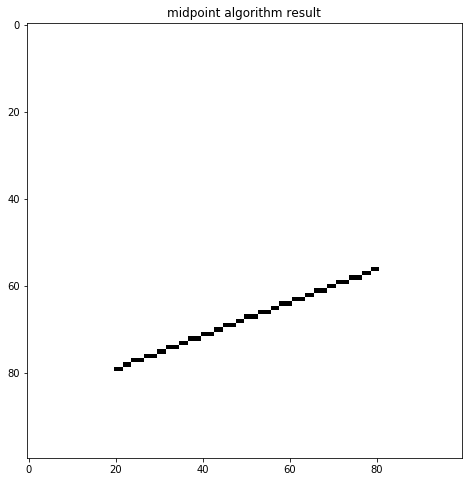

In [20]:
# Midpoint algorithm
x0 = 20
y0 = 20
x1 = 80
y1 = 43
canvas = reset_canvas(N)
dx = x1 - x0
dy = y1 - y0
# init
d = 2 * dy - dx
y = y0
for x in range(x0, x1 + 1):
    canvas[(N - 1) - y, x] = 0
    if d < 0:
        # midpoint above line, choose E
        d = d + 2 * dy
    else:
        # midpoint below line, choose NE
        d = d + 2 * (dy - dx)
        y = y + 1
show_canvas(canvas, "midpoint algorithm result")

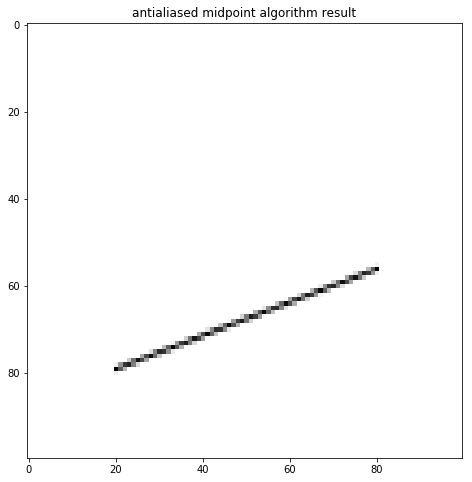

In [23]:
# Midpoint algorithm --> Gupta-Sproull algorithm
canvas = reset_canvas(N)
x0 = 20
y0 = 20
x1 = 80
y1 = 43
dx = x1 - x0
dy = y1 - y0
# init
d = 2 * dy - dx
y = y0
two_v_dx = 0
def get_aa_intensity(dist):
    return min(1.0, abs(dist))
for x in range(x0, x1 + 1):
    
    denom = (2 * np.sqrt(dx**2 + dy**2))
    
    D = two_v_dx / denom
    D_up = (2 * dx - two_v_dx) / denom
    D_down = (2 * dx + two_v_dx) / denom
    canvas[(N - 1) - y, x] = get_aa_intensity(D)
    canvas[(N - 1) - (y + 1), x] = get_aa_intensity(D_up)
    canvas[(N - 1) - (y - 1), x] = get_aa_intensity(D_down)
           
    if d < 0:
        # midpoint above line, choose E
        two_v_dx = d + dx        
        d = d + 2 * dy
    else:
        # midpoint below line, choose NE
        two_v_dx = d - dx
        d = d + 2 * (dy - dx)
        y = y + 1

show_canvas(canvas, "antialiased midpoint algorithm result")